## Required Libraries

Using TensorFlow and Keras

In [30]:
from keras import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import scipy
import sklearn
from keras import Sequential
from keras.layers import Dense

## Reading Data from .csv file

In [24]:
df=pd.read_csv("Boston.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.columns = map(str.upper, df.columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Seperating the target variable columns

In [28]:
target=df.loc[:, df.columns == 'MEDV']
Y=target
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Seperating the Attributes

In [27]:
Attributes=df[['CRIM','RM','AGE','DIS','LSTAT']]
X=Attributes
Attributes.head()

,CRIM,RM,AGE,DIS,LSTAT
0,0.00632,6.575,65.2,4.0900,4.98
1,0.02731,6.421,78.9,4.9671,9.14
2,0.02729,7.185,61.1,4.9671,4.03
3,0.03237,6.998,45.8,6.0622,2.94
4,0.06905,7.147,54.2,6.0622,5.33


## Seperating the Dataset into Test and Train datasets

In [5]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Attributes, target, test_size = 0.20, random_state = 0)
print("X Train: ", X_train.shape)
print("Y Train: ", Y_train.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", Y_test.shape)

('X Train: ', (404, 5))
('Y Train: ', (404, 1))
('X Test: ', (102, 5))
('Y Test: ', (102, 1))


## Data Scaling 

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

Dataset often contain features highly varying in magnitudes, units and range. This is a propblem because most of the machine learning algorithms use Eucledian distance between two data points in their computations.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. This is the case in Boston dataset as well as seen from the cells above. Therefore, we do data scaling first before fitting the neural network model.


In [33]:
# using sklearn library for preprocessing 
from sklearn import preprocessing
import numpy as np
X=preprocessing.scale(X)
Y=preprocessing.scale(Y)
X_scaled = preprocessing.scale(X_train)
Y_scaled = preprocessing.scale(Y_train)
X_test_scaled = preprocessing.scale(X_test)
Y_test_scaled = preprocessing.scale(Y_test)

## Fitting neural network model from Keras package 

In [46]:

# create model
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

The Graphs below plots Mean Squared Error and Model Loss for both training and testing datasets. The graphs indicates that the model needs better training.

['loss', 'mse', 'val_loss', 'val_mse']


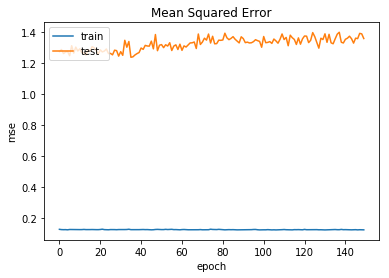

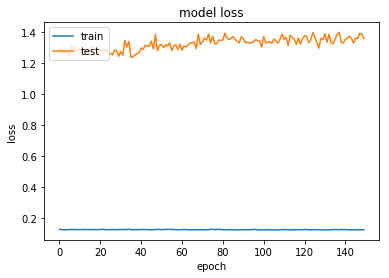

In [52]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Analysis of Predicted Values and Actual Values for MEDV(Price)



The table below shows the Predicted Values and the Actual Values Put together

In [18]:
from sklearn.preprocessing import MinMaxScaler
import math
import decimal

prediction = model.predict(X_test_scaled)
prediction.tolist()

predicted_values = [item for sublist in prediction.tolist() for item in sublist]
predicted_values = [round(i,2) for i in predicted_values]

actual_values = [item for sublist in Y_test_scaled.tolist() for item in sublist]


df = pd.DataFrame(list(zip(actual_values, predicted_values)), columns =['Actual Values', 'Predicted Values']) 
df 


,Actual Values,Predicted Values
0,0.042154,-0.03
1,3.078579,0.20
2,0.086482,0.09
3,-1.542549,0.37
4,-0.112991,0.05
5,-0.257055,-0.04
6,-0.179482,0.05
7,-0.390037,-0.03
8,-0.678165,0.09
9,-0.401119,0.08
